# **Trabalho Ciência de dados - Base de dados INMET(Instituto Nacional de Meteorologia)**

Trabalho para a materia de ciência de dados, com a utilizacao da base de dados do  INMET.


*Pergunta base para a análise: As temperaturas no Brasil tem aumentado nos últimos anos?*


<br><br>
link dos dados: https://portal.inmet.gov.br/dadoshistoricos



<br><br>


*   Gabriel B. Dias		18.00487-3
*   Raphael Kalaes		18.02011-9

<br>

---------

# **1º passo - Download das bases de dados e concatenação dos dados.** 

Como a base de dados do INMET é separado por cidade e também por ano os dados vem muito separados, oque torna a utilização deles inviável. Por isso é necessário a concatenação de dados.

Foram utilizadas para esta análise as cidades de Porto Alegre e Brasília.


In [ ]:
import os                     #pacote os
import zipfile                #para arquivos zipados
import pandas as pd

#preparando a pasta
os.mkdir('dados')
os.chdir('dados')

#definindo o periodo dos dados
#nesse caso, dados entre 2001 e 2022
periodo = []
for ano in range (2000, 2023):
  periodo.append(ano)
 
for i in periodo:
  arquivo = [f'https://portal.inmet.gov.br/uploads/dadoshistoricos/{i}.zip']
  for i,j in zip(periodo, arquivo):
    download = os.system(f'wget -o {i}.zip {j}')
    
#extraindo os arquivos zipados e deletando os zips 

#para arquivos até 2018
for i in periodo[1:-3]:
  zipfile.ZipFile(f'/content/dados/{i}.zip').extractall('/content/dados')
  os.remove(f'/content/dados/{i}.zip')

#para arquivos a partir de 2019
for i in periodo[-3:]:
  zipfile.ZipFile(f'/content/dados/{i}.zip').extractall(f'/content/dados/{i}')
  os.remove(f'/content/dados/{i}.zip')



In [ ]:
#PA
import pandas as pd

ds_PA = None

for i in periodo[1:23]:  # Atualizei o intervalo para abranger os anos de 2001 a 2022
    if i <= 2021:
        file_name = f'INMET_S_RS_A801_PORTO ALEGRE_01-01-{i}_A_31-12-{i}.CSV'
    else:
        file_name = f'INMET_S_RS_A801_PORTO ALEGRE - JARDIM BOTANICO_01-01-{i}_A_31-12-{i}.CSV'
        
    file_path = f'/content/dados/{i}/{file_name}'
    
    if i <= 2018:
        column_names = {
            'DATA (YYYY-MM-DD)': 'Data',
            'HORA (UTC)': 'HoraZ',
            'RADIACAO GLOBAL (KJ/m²)': 'Rad',
        }
        date_col = 'DATA (YYYY-MM-DD)'
        time_col = 'HORA (UTC)'
    else:
        column_names = {
            'Data': 'Data',
            'Hora UTC': 'HoraZ',
            'RADIACAO GLOBAL (Kj/m²)': 'Rad',
            'RADIACAO GLOBAL (KJ/m²)': 'Rad',  # Adicione essa linha para corrigir o nome da coluna
        }
        date_col = 'Data'
        time_col = 'Hora UTC'
    
    if ds_PA is None:
        ds_PA = pd.read_csv(file_path, sep=';', thousands='.', decimal=',', skiprows=[0, 1, 2, 3, 4, 5, 6, 7],
                            encoding='latin-1', index_col=None)
        ds_PA = ds_PA.rename(columns=column_names)
    else:
        df = pd.read_csv(file_path, sep=';', thousands='.', decimal=',', skiprows=[0, 1, 2, 3, 4, 5, 6, 7],
                         encoding='latin-1', index_col=None)
        df = df.rename(columns=column_names)
        ds_PA = pd.concat([ds_PA, df])

ds_PA = ds_PA.drop(['PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
                    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
                    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
                    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
                    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
                    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'Unnamed: 19'], axis=1)

#print(ds_PA.columns)  # Exibir as colunas existentes

ds_PA.columns = ['Data', 'HoraZ', 'Chuva', 'P', 'Rad', 'TempC', 'TempOrvC', 'TempMaxC',	'TempMinC', 'UR', 'Dir', 'Rajadas', 'Vento']
ds_PA['Data'] = pd.to_datetime(ds_PA['Data'], dayfirst=True)






In [ ]:
#Brasilia
import pandas as pd

ds_brasilia = None

for i in periodo[1:23]:  # Atualizei o intervalo para abranger os anos de 2001 a 2022
    file_path = f'/content/dados/{i}/INMET_CO_DF_A001_BRASILIA_01-01-{i}_A_31-12-{i}.CSV'
    
    if i <= 2018:
        column_names = {
            'DATA (YYYY-MM-DD)': 'Data',
            'HORA (UTC)': 'HoraZ',
            'RADIACAO GLOBAL (KJ/m²)': 'Rad',
        }
        date_col = 'DATA (YYYY-MM-DD)'
        time_col = 'HORA (UTC)'
    else:
        column_names = {
            'Data': 'Data',
            'Hora UTC': 'HoraZ',
            'RADIACAO GLOBAL (Kj/m²)': 'Rad',
            'RADIACAO GLOBAL (KJ/m²)': 'Rad',  # Adicione essa linha para corrigir o nome da coluna
        }
        date_col = 'Data'
        time_col = 'Hora UTC'
    
    if ds_brasilia is None:
        ds_brasilia = pd.read_csv(file_path, sep=';', thousands='.', decimal=',', skiprows=[0, 1, 2, 3, 4, 5, 6, 7],
                            encoding='latin-1', index_col=None)
        ds_brasilia = ds_brasilia.rename(columns=column_names)
    else:
        df = pd.read_csv(file_path, sep=';', thousands='.', decimal=',', skiprows=[0, 1, 2, 3, 4, 5, 6, 7],
                         encoding='latin-1', index_col=None)
        df = df.rename(columns=column_names)
        ds_brasilia = pd.concat([ds_brasilia, df])

ds_brasilia = ds_brasilia.drop(['PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
                    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
                    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
                    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
                    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
                    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'Unnamed: 19'], axis=1)

#print(ds_brasilia.columns)  # Exibir as colunas existentes

ds_brasilia.columns = ['Data', 'HoraZ', 'Chuva', 'P', 'Rad', 'TempC', 'TempOrvC', 'TempMaxC',	'TempMinC', 'UR', 'Dir', 'Rajadas', 'Vento']
ds_brasilia['Data'] = pd.to_datetime(ds_brasilia['Data'], dayfirst=True)


# **2º passo - Gráfico das variações de temperatura em cada cidade.** 

Criação de gráfico das variações de temperatura em cada cidade para análise futura.


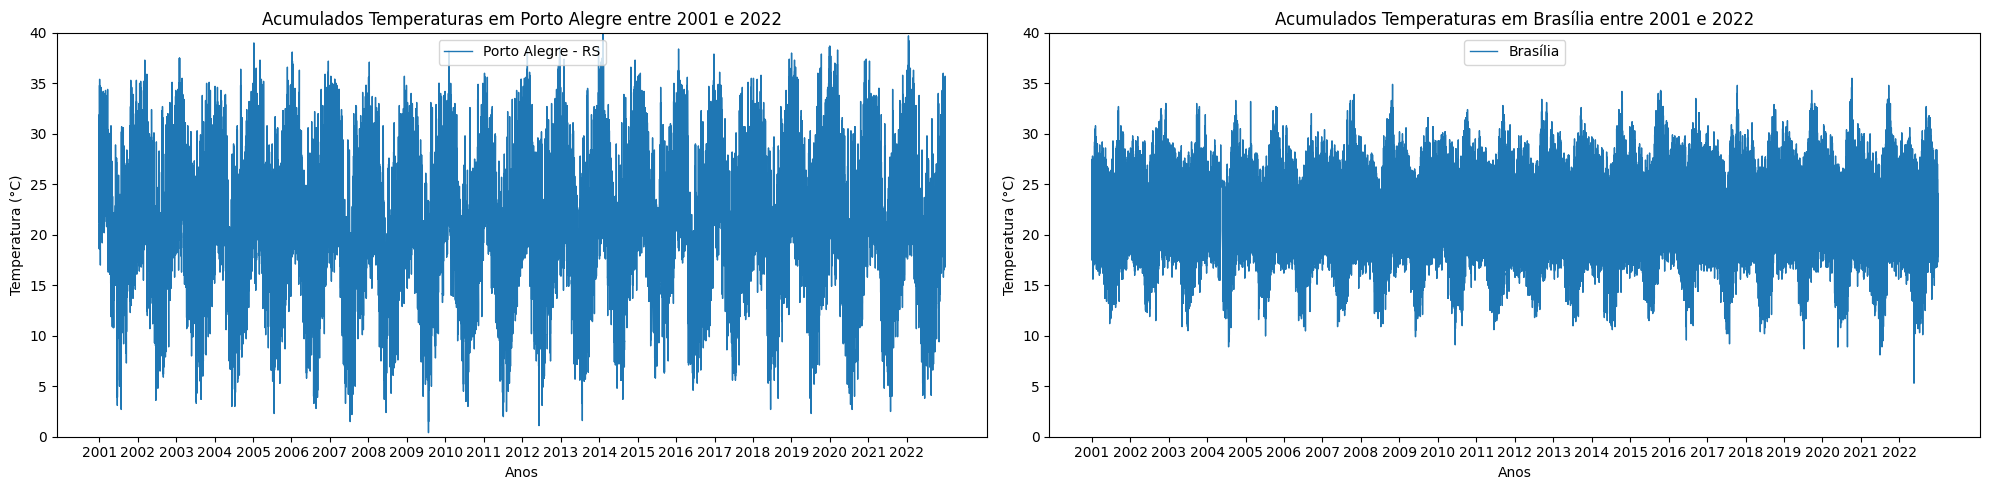

In [ ]:
import os
import zipfile
import pandas as pd
from matplotlib import pyplot as plt

# Primeiro gráfico - Porto Alegre
dstemp_PA = ds_PA.query('TempC >= -15')
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Gráfico 1 - Porto Alegre
axs[0].plot(dstemp_PA.Data, dstemp_PA.TempC, label='Porto Alegre - RS', linewidth=1.0)
axs[0].set_xlabel('Anos')
axs[0].set_ylabel('Temperatura (°C)')
axs[0].set_title('Acumulados Temperaturas em Porto Alegre entre 2001 e 2022')
axs[0].set_ylim(0, 40)  # Limitar o eixo y entre 0 e 40 graus
axs[0].legend(loc=9)

# Segundo gráfico - Brasília
dstemp_brasilia = ds_brasilia.query('TempC >= -15')
axs[1].plot(dstemp_brasilia.Data, dstemp_brasilia.TempC, label='Brasília', linewidth=1.0)
axs[1].set_xlabel('Anos')
axs[1].set_ylabel('Temperatura (°C)')
axs[1].set_title('Acumulados Temperaturas em Brasília entre 2001 e 2022')
axs[1].set_ylim(0, 40)  # Limitar o eixo y entre 0 e 40 graus
axs[1].legend(loc=9)

# Definir ticks no eixo x com todos os anos de 2001 a 2022
xticks = pd.date_range(start='2001-01-01', end='2022-12-31', freq='AS')
plt.setp(axs, xticks=xticks, xticklabels=[x.year for x in xticks])

plt.tight_layout()
plt.show()




***Resultados da Análise***

As temperaturas em Brasília aparentam ter menos variações do quem em Porto Alegre.

Porto Alegre mostra mais incidência de temperaturas consideradas extremas, tanto para o frio quanto para o calor.

---

# **3º passo - Gráfico Boxplot: Distribuição de temperaturas nas cidades.** 



Criação de gráfico boxplot para análise.

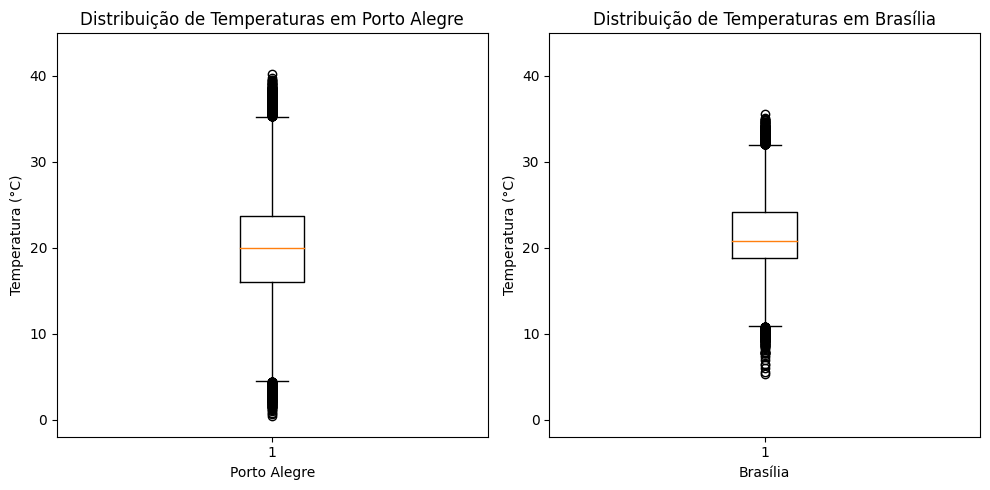

In [ ]:
import os
import zipfile
import pandas as pd
from matplotlib import pyplot as plt

# Dados do primeiro gráfico - Porto Alegre
dstemp_PA = ds_PA.query('TempC >= -15')
data_PA = dstemp_PA.TempC

# Dados do segundo gráfico - Brasília
dstemp_brasilia = ds_brasilia.query('TempC >= -15')
data_brasilia = dstemp_brasilia.TempC

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Primeiro gráfico - Boxplot de Porto Alegre
axs[0].boxplot(data_PA)
axs[0].set_xlabel('Porto Alegre')
axs[0].set_ylabel('Temperatura (°C)')
axs[0].set_title('Distribuição de Temperaturas em Porto Alegre')
axs[0].set_ylim(-2, 45)  # Limitar o eixo y entre 0 e 40 graus

# Segundo gráfico - Boxplot de Brasília
axs[1].boxplot(data_brasilia)
axs[1].set_xlabel('Brasília')
axs[1].set_ylabel('Temperatura (°C)')
axs[1].set_title('Distribuição de Temperaturas em Brasília')
axs[1].set_ylim(-2, 45)  # Limitar o eixo y entre 0 e 40 graus


plt.tight_layout()
plt.show()


***Resultados da Análise***


Porto Alegre:
Seu limite inferior de temperaturas é aproximadamente 5 °C, seu limite superior de temperaturas é aproximadamente 35 °C, tem sua mediana em aproximadamente 20 °C, seu 1° quartil é aproximadamente 15 °C, seu 3° quartil é aproximadamente 25 °C e possui outliers.

Brasília:
Seu limite inferior de temperaturas é aproximadamente 10 °C, seu limite superior de temperaturas é aproximadamente 32 °C, tem sua mediana em aproximadamente 21 °C, seu 1° quartil é aproximadamente 20 °C, seu 3° quartil é aproximadamente 25 °C e possui outliers.

O gráfico mostra que a variabilidade das temperaturas em Porto Alegre parece ser um pouco maior do que em Brasília, uma vez que o boxplot é ligeiramente mais alongado verticalmente.

---

# **4º passo - Gráfico de linhas: Média das temperaturas anuais das cidades.** 

Criação de gráfico de linhas para análise.

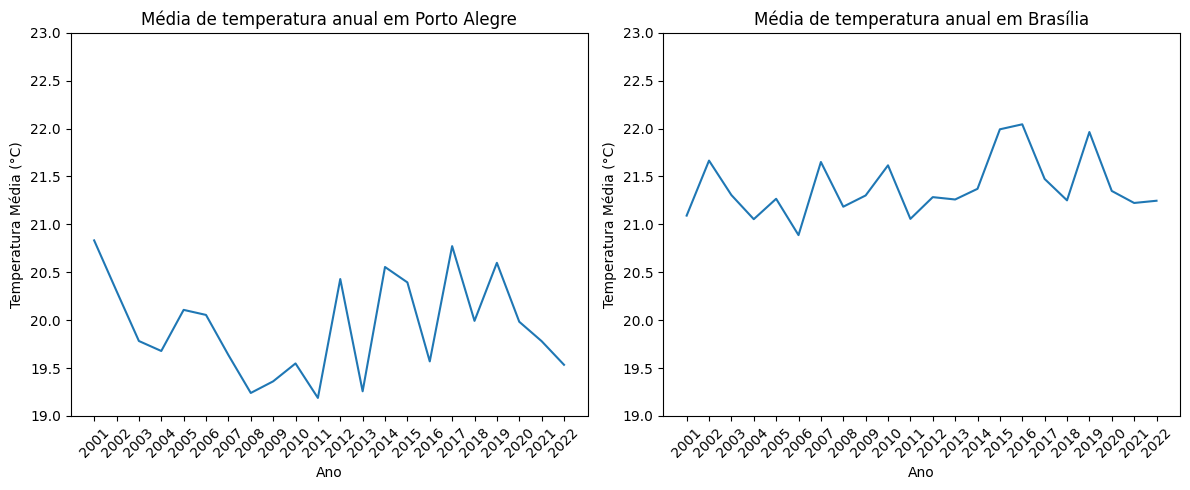

In [ ]:
import matplotlib.pyplot as plt

# Dados do primeiro gráfico - Porto Alegre
years_PA = []
mean_temps_PA = []

for year in range(2001, 2023):
    ds_PA_year = ds_PA.query(f'Data <="{year}-12-31"')
    ds_PA_year = ds_PA_year.query(f'Data >= "{year}-01-01"')
    ds_PA_year = ds_PA_year.query('TempC >= -15')
    mean_temp = ds_PA_year.TempC.mean()

    years_PA.append(str(year))
    mean_temps_PA.append(mean_temp)

# Dados do segundo gráfico - Brasília
years_brasilia = []
mean_temps_brasilia = []

for year in range(2001, 2023):
    ds_brasilia_year = ds_brasilia.query(f'Data <="{year}-12-31"')
    ds_brasilia_year = ds_brasilia_year.query(f'Data >= "{year}-01-01"')
    ds_brasilia_year = ds_brasilia_year.query('TempC >= -15')
    mean_temp = ds_brasilia_year.TempC.mean()
    
    years_brasilia.append(str(year))
    mean_temps_brasilia.append(mean_temp)

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico - Porto Alegre
axs[0].plot(years_PA, mean_temps_PA)
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Temperatura Média (°C)')
axs[0].set_title('Média de temperatura anual em Porto Alegre')
axs[0].set_ylim(19, 23)  # Limitar o eixo y entre 19 e 23 graus
axs[0].tick_params(axis='x', rotation=45)

# Segundo gráfico - Brasília
axs[1].plot(years_brasilia, mean_temps_brasilia)
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Temperatura Média (°C)')
axs[1].set_title('Média de temperatura anual em Brasília')
axs[1].set_ylim(19, 23)  # Limitar o eixo y entre 19 e 23 graus
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


***Resultados da Análise***


Porto Alegre:

As temperaturas médias anuais em Porto Alegre variaram entre 19,19 °C (em 2011) e 20,83 °C (em 2001).
Não há uma tendência clara de aumento ou diminuição significativa nas temperaturas médias ao longo do período analisado.

Brasília:

As temperaturas médias anuais em Brasília variaram entre 20,89 °C (em 2006) e 22,04 °C (em 2016).
Em comparação com Porto Alegre, as temperaturas médias em Brasília são um pouco mais altas, mantendo-se em torno de 21 °C a 22 °C na maioria dos anos.
Também não há uma tendência clara de aumento ou diminuição significativa nas temperaturas médias em Brasília ao longo do período analisado.

---

# **5º passo - Cálculo desvio padrão por cidade em cada ano.** 

### **Porto Alegre:**

In [ ]:
import numpy as np

years = []
std_temps = []

for year in range(2001, 2023):
    ds_PA_year = ds_PA.query(f'Data <="{year}-12-31"')
    ds_PA_year = ds_PA_year.query(f'Data >= "{year}-01-01"')
    ds_PA_year = ds_PA_year.query('TempC >= -15')
    temperatures = ds_PA_year.TempC.values
    
    std_temp = np.std(temperatures)
    
    years.append(year)
    std_temps.append(std_temp)
    print(f"Desvio padrão das temperaturas em Porto Alegre em {year}: {std_temp}")


Desvio padrão das temperaturas em Porto Alegre em 2001: 5.327960043863309
Desvio padrão das temperaturas em Porto Alegre em 2002: 5.66327321920462
Desvio padrão das temperaturas em Porto Alegre em 2003: 5.7698665266011515
Desvio padrão das temperaturas em Porto Alegre em 2004: 5.573271417800944
Desvio padrão das temperaturas em Porto Alegre em 2005: 5.635833951336826
Desvio padrão das temperaturas em Porto Alegre em 2006: 5.616692134121994
Desvio padrão das temperaturas em Porto Alegre em 2007: 6.22810293748285
Desvio padrão das temperaturas em Porto Alegre em 2008: 5.491251161522859
Desvio padrão das temperaturas em Porto Alegre em 2009: 5.762705305824456
Desvio padrão das temperaturas em Porto Alegre em 2010: 5.59956926186
Desvio padrão das temperaturas em Porto Alegre em 2011: 5.755418770955449
Desvio padrão das temperaturas em Porto Alegre em 2012: 6.017920284303617
Desvio padrão das temperaturas em Porto Alegre em 2013: 5.797276748704595
Desvio padrão das temperaturas em Porto Ale

***Resultados da Análise***

Variação do desvio padrão: O desvio padrão das temperaturas em Porto Alegre apresenta certa variação ao longo dos anos, indicando flutuações nas temperaturas registradas.

Faixa de valores: O desvio padrão varia aproximadamente entre 4.99 e 6.23, mostrando que as temperaturas em Porto Alegre podem apresentar certa dispersão em relação à média.

Anos com maior dispersão: Os anos de 2007, 2012 e 2016 se destacam por apresentarem desvio padrão acima de 6, indicando maior variabilidade nas temperaturas durante esses períodos.

Estabilidade ao longo do tempo: Não é possível identificar uma tendência clara de aumento ou diminuição do desvio padrão ao longo dos anos, pois os valores não seguem uma sequência definida.

---

## **Brasília:**

In [ ]:
import numpy as np

years = []
std_temps = []

for year in range(2001, 2023):
    ds_brasilia_year = ds_brasilia.query(f'Data <="{year}-12-31"')
    ds_brasilia_year = ds_brasilia_year.query(f'Data >= "{year}-01-01"')
    ds_brasilia_year = ds_brasilia_year.query('TempC >= -15')
    temperatures = ds_brasilia_year.TempC.values
    
    std_temp = np.std(temperatures)
    
    years.append(year)
    std_temps.append(std_temp)
    print(f"Desvio padrão das temperaturas em Brasília em {year}: {std_temp}")

Desvio padrão das temperaturas em Brasília em 2001: 3.5275473070924304
Desvio padrão das temperaturas em Brasília em 2002: 3.6648984311970763
Desvio padrão das temperaturas em Brasília em 2003: 3.592242060399332
Desvio padrão das temperaturas em Brasília em 2004: 3.676768357318293
Desvio padrão das temperaturas em Brasília em 2005: 3.514984092580043
Desvio padrão das temperaturas em Brasília em 2006: 3.369758105659872
Desvio padrão das temperaturas em Brasília em 2007: 3.685071924964216
Desvio padrão das temperaturas em Brasília em 2008: 3.7081392902585275
Desvio padrão das temperaturas em Brasília em 2009: 3.3898420060336094
Desvio padrão das temperaturas em Brasília em 2010: 3.7738599419781815
Desvio padrão das temperaturas em Brasília em 2011: 3.627939869687488
Desvio padrão das temperaturas em Brasília em 2012: 3.650978381301488
Desvio padrão das temperaturas em Brasília em 2013: 3.5673803699045274
Desvio padrão das temperaturas em Brasília em 2014: 3.7875377039721263
Desvio padrão

***Resultados da Análise***

Ao analisar os valores de desvio padrão das temperaturas em Brasília ao longo dos anos, podemos observar o seguinte padrão:

Os valores do desvio padrão variam entre aproximadamente 3.37 e 4.09, indicando uma certa variabilidade nas temperaturas ao longo dos anos.

Não parece haver uma tendência clara de aumento ou diminuição do desvio padrão das temperaturas. Os valores flutuam sem uma direção específica.

No geral, os valores do desvio padrão estão relativamente próximos uns dos outros, sugerindo uma consistência moderada na variabilidade das temperaturas em Brasília ao longo do período analisado.

---

# **6º passo - Gráfico de barras: Média das temperaturas em cada estação do ano nas cidades**



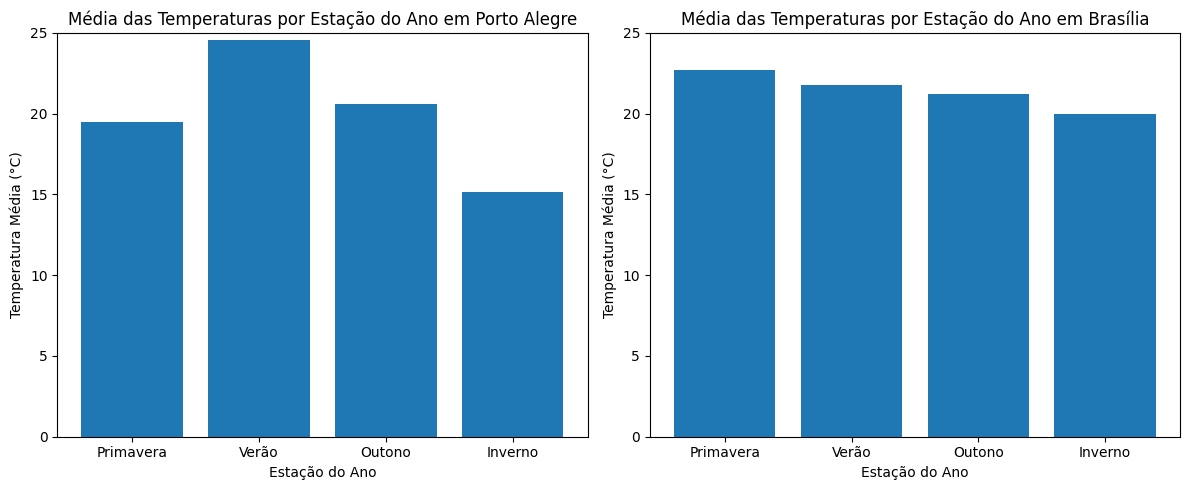

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar temperaturas acima de -15 graus - Porto Alegre
ds_PA_filtrado = ds_PA.loc[ds_PA['TempC'] > -15].copy()

# Criar uma coluna com o mês para facilitar a análise - Porto Alegre
ds_PA_filtrado['Mes'] = pd.to_datetime(ds_PA_filtrado['Data']).dt.month

# Filtrar temperaturas acima de -15 graus - Brasília
ds_brasilia_filtrado = ds_brasilia.loc[ds_brasilia['TempC'] > -15].copy()

# Criar uma coluna com o mês para facilitar a análise - Brasília
ds_brasilia_filtrado['Mes'] = pd.to_datetime(ds_brasilia_filtrado['Data']).dt.month

# Definir os períodos das estações do ano
estacoes = {'Primavera': [9, 10, 11], 'Verão': [12, 1, 2], 'Outono': [3, 4, 5], 'Inverno': [6, 7, 8]}

# Calcular a média das temperaturas para cada estação do ano - Porto Alegre
medias_estacoes_PA = {}
for estacao, meses in estacoes.items():
    medias_estacoes_PA[estacao] = ds_PA_filtrado[ds_PA_filtrado['Mes'].isin(meses)]['TempC'].mean()

# Calcular a média das temperaturas para cada estação do ano - Brasília
medias_estacoes_brasilia = {}
for estacao, meses in estacoes.items():
    medias_estacoes_brasilia[estacao] = ds_brasilia_filtrado[ds_brasilia_filtrado['Mes'].isin(meses)]['TempC'].mean()

# Configurar a figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotar o gráfico de barras das médias das temperaturas por estação do ano - Porto Alegre
estacoes_PA, temperaturas_PA = zip(*medias_estacoes_PA.items())
axs[0].bar(estacoes_PA, temperaturas_PA)
axs[0].set_xlabel('Estação do Ano')
axs[0].set_ylabel('Temperatura Média (°C)')
axs[0].set_title('Média das Temperaturas por Estação do Ano em Porto Alegre')
axs[0].set_ylim(0, 25)

# Plotar o gráfico de barras das médias das temperaturas por estação do ano - Brasília
estacoes_brasilia, temperaturas_brasilia = zip(*medias_estacoes_brasilia.items())
axs[1].bar(estacoes_brasilia, temperaturas_brasilia)
axs[1].set_xlabel('Estação do Ano')
axs[1].set_ylabel('Temperatura Média (°C)')
axs[1].set_title('Média das Temperaturas por Estação do Ano em Brasília')
axs[1].set_ylim(0, 25)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()




***Resultados da Análise***

Comparando as duas cidades, podemos observar que:

Porto Alegre tem uma amplitude térmica maior entre o verão e o inverno, com diferença de cerca de 10 graus Celsius.

Brasília apresenta uma variação menor entre o verão e o inverno, com diferença de aproximadamente 3 graus Celsius.

Em Porto Alegre, o verão é a estação mais quente, seguido pelo outono e primavera, enquanto o inverno é a estação mais fria.

Em Brasília, o verão e a primavera são as estações mais quentes, seguidas pelo outono e o inverno.

Essas informações indicam diferentes padrões climáticos entre as duas cidades. Porto Alegre apresenta uma maior variação sazonal, com um inverno mais frio e um verão mais quente, enquanto Brasília tem um clima mais estável ao longo do ano, com temperaturas mais consistentes em todas as estações.

# **7º passo - Datafólio** 


<img src="https://github.com/GabrielBDias77/cienciadosdados/assets/79618686/5d8e314f-448d-4bd0-bc2a-043a2ae01322">
